<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/ready/xgb_hyper!!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install colorama
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier

In [30]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import train_test_split
import seaborn as sns
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import xgboost as xgb
!pip install shap
import shap

     |████████████████████████████████| 358kB 8.2MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490499 sha256=e9f610775a7aa0cb57d1025a054704a1143de6ec145eb53a760dbf28e32cf0df
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [31]:
data = pd.read_csv('/content/covid_data_6_mistakes (1).csv')

In [32]:
data=data.drop('Unnamed: 0', axis=1)

In [48]:
X = data.drop('Ab_ind', axis=1)  
Y = data['Ab_ind'] 

In [51]:
#splitting a testing set from the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)
#splitting a validation set from the training set to tune parameters
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, stratify = Y_train, random_state = 42)

In [52]:
#creating a scorer from the f1-score metric
f1_scorer = make_scorer(f1_score)

In [53]:
# defining the space for hyperparameter tuning
space = {'eta': hp.uniform("eta", 0.1, 1),
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 50, 200, 1),
        'reg_lambda' : hp.uniform('reg_lambda', 0, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 200, 10)
        }

In [54]:
#defining function to optimize
def hyperparameter_tuning(space):
    clf = xgb.XGBClassifier(
        n_estimators = int(space['n_estimators']),       #number of trees to use
                            eta = space['eta'],                              #learning rate
                            max_depth = int(space['max_depth']),             #depth of trees
                            gamma = space['gamma'],                          #loss reduction required to further partition tree
                            reg_alpha = int(space['reg_alpha']),             #L1 regularization for weights
                            reg_lambda = space['reg_lambda'],                #L2 regularization for weights
                            min_child_weight = space['min_child_weight'],    #minimum sum of instance weight needed in child
                            colsample_bytree = space['colsample_bytree'],    #ratio of column sampling for each tree
                            nthread = -1)                                    #number of parallel threads used
    
    evaluation = [(X_train, Y_train), (X_val, Y_val)]
    
    clf.fit(X_train, Y_train,
            eval_set = evaluation,
            early_stopping_rounds = 10,
            verbose = False)

    pred = clf.predict(X_val)
    pred = [1 if i>= 0.5 else 0 for i in pred]
    f1 = f1_score(Y_val, pred)
    print ("SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

In [ ]:
# run the hyper paramter tuning
trials = Trials()
best = fmin(fn = hyperparameter_tuning,
            space = space,
            algo = tpe.suggest,
            max_evals = 100,
            trials = trials)

print (best)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

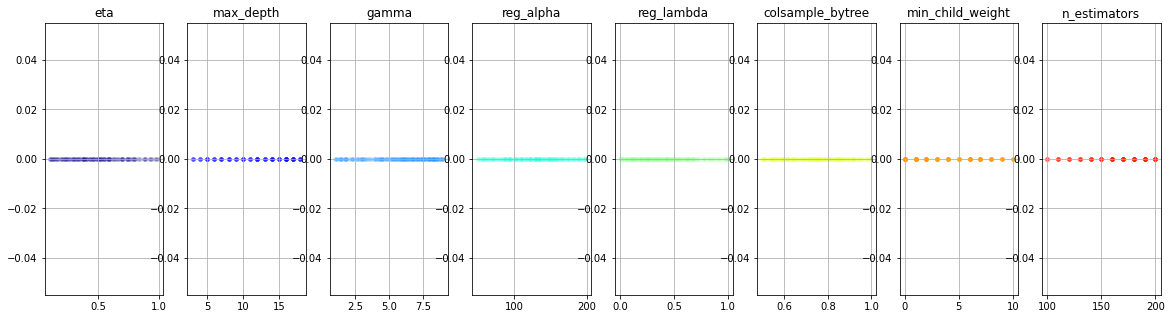

In [56]:
#plotting feature space and f1-scores for the different trials
parameters = space.keys()
cols = len(parameters)

f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)
    axes[i].grid()

In [41]:

#printing best model parameters
print(best)

{'colsample_bytree': 0.8718459917319313, 'eta': 0.14172415311624414, 'gamma': 8.957819521303659, 'max_depth': 9.0, 'min_child_weight': 2.0, 'n_estimators': 180.0, 'reg_alpha': 119.0, 'reg_lambda': 0.2379477185003812}


In [42]:
#initializing XGBoost Classifier with best model parameters
best_clf = xgb.XGBClassifier(n_estimators = int(best['n_estimators']), 
                            eta = best['eta'], 
                            max_depth = int(best['max_depth']), 
                            gamma = best['gamma'], 
                            reg_alpha = int(best['reg_alpha']), 
                            min_child_weight = best['min_child_weight'], 
                            colsample_bytree = best['colsample_bytree'], 
                            nthread = -1)

In [43]:
best_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8718459917319313,
              eta=0.14172415311624414, gamma=8.957819521303659,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=2.0, missing=None, n_estimators=180, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=119, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
#using the model to predict on the test set
Y_pred = best_clf.predict(X_test)

In [45]:
#printing f1 score of test set predictions
print('The f1-score on the test data is: {0:.2f}'.format(f1_score(Y_test, Y_pred)))

The f1-score on the test data is: 0.00


In [46]:
#creating a confusion matrix and labels
cm = confusion_matrix(Y_test, Y_pred)
labels = ['Normal', 'Fraud']

Text(0.5, 1.0, 'Confusion Matrix for Credit Card Fraud Detection')

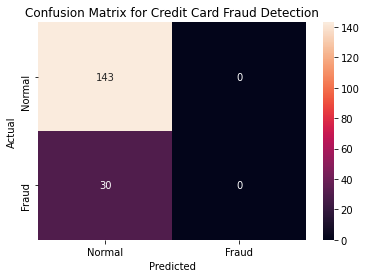

In [47]:
#plotting the confusion matrix
sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Credit Card Fraud Detection')

In [9]:
X = data.drop('Ab_ind', axis=1)  
Y = data['Ab_ind'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2020, stratify=y)

In [10]:
X_train.columns

Index(['Min_Platlets', 'Max_ESR', 'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes', 'Gender', 'Max_CRP', 'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'ALT', 'AST', 'duration',
       'Age', 'Max_Creatinine', 'RF_0.0', 'RF_1.0', 'RF_2.0', 'RF_3.0', 'GFR',
       'L/Pl_Ratio'],
      dtype='object')

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier(class_weight={0: 1, 1:1000})
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [67]:
# CatBoostClassifier
model = CatBoostClassifier(                        
                      
                         )

In [ ]:
grid = {'learning_rate': [.01, .1, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train_scaled, 
                                       y=y_train)

In [ ]:
model.fit(X_train_scaled,y_train)
cat_pred = model.predict(X_test_scaled)
print('CBC conf{0}'.format(confusion_matrix(y_test, cat_pred)))

In [68]:
import catboost
from catboost import *
from catboost import datasets

In [91]:
train_df = pd.read_csv('/content/covid_data_6_mistakes (1).csv')
train_df = train_df.drop("Unnamed: 0",axis=1)
train_df.head()

Min_Platlets  Max_ESR  Max_Fibrinogen  ...   GFR  Ab_ind  L/Pl_Ratio
0         142.8     54.0             4.8  ...  87.0       0        38.1
1         261.5     36.0            10.0  ...  92.0       0        20.2
2         225.4     36.0             9.3  ...  96.0       0        29.0
3         323.3     57.0             3.7  ...  94.0       1        19.5
4         168.8     52.0             7.3  ...  90.0       1        33.1

[5 rows x 25 columns]

In [92]:
y = train_df.Ab_ind
X = train_df.drop('Ab_ind', axis=1)

In [90]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [93]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 715, One count = 148


In [94]:
import os
dataset_dir = './amazon'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# We will be able to work with files with/without header and
# with different separators.
train_df.to_csv(
    os.path.join(dataset_dir, 'train.tsv'),
    index=False, sep='\t', header=False
)
# test_df.to_csv(
#     os.path.join(dataset_dir, 'test.tsv'),
#     index=False, sep='\t', header=False
# )

train_df.to_csv(
    os.path.join(dataset_dir, 'train.csv'),
    index=False, sep=',', header=True
)
# test_df.to_csv(
#     os.path.join(dataset_dir, 'test.csv'),
#     index=False, sep=',', header=True
# )

In [95]:
pool1 = Pool(data=X, label=y)
pool2 = Pool(
    data=os.path.join(dataset_dir, 'train.csv'), 
    delimiter=',', 
    column_description=os.path.join(dataset_dir, 'train.cd'),
    has_header=True
)
pool3 = Pool(data=X, cat_features=cat_features)

# Fastest way to create a Pool is to create it from numpy matrix.
# This way should be used if you want fast predictions
# or fastest way to load the data in python.

X_prepared = X.values.astype(str).astype(object)
# For FeaturesData class categorial features must have type str

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=y.values
)

print('Dataset shape')
print('dataset 1:' + str(pool1.shape) +
      '\ndataset 2:' + str(pool2.shape) + 
      '\ndataset 3:' + str(pool3.shape) +
      '\ndataset 4: ' + str(pool4.shape))

print('\n')
print('Column names')
print('dataset 1:')
print(pool1.get_feature_names()) 
print('\ndataset 2:')
print(pool2.get_feature_names())
print('\ndataset 3:')
print(pool3.get_feature_names())
print('\ndataset 4:')
print(pool4.get_feature_names())

CatBoostError: ignored

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [ ]:
X_validation.info()

In [98]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    
    eval_set=(X_validation, y_validation)
    
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.6137397	test: 0.6183518	best: 0.6183518 (0)	total: 10.5ms	remaining: 41.8ms
1:	learn: 0.5664646	test: 0.5731256	best: 0.5731256 (1)	total: 14.3ms	remaining: 21.5ms
2:	learn: 0.5218518	test: 0.5347380	best: 0.5347380 (2)	total: 17.9ms	remaining: 11.9ms
3:	learn: 0.4814188	test: 0.5033685	best: 0.5033685 (3)	total: 22.8ms	remaining: 5.71ms
4:	learn: 0.4549883	test: 0.4811430	best: 0.4811430 (4)	total: 26.3ms	remaining: 0us

bestTest = 0.4811430042
bestIteration = 4

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [99]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#     verbose=5,
)
model.fit(
    X_train, y_train,
    
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.179682
0:	learn: 0.5601878	test: 0.5702898	best: 0.5702898 (0)	total: 4.18ms	remaining: 58.5ms
1:	learn: 0.4962147	test: 0.5107578	best: 0.5107578 (1)	total: 7.79ms	remaining: 50.6ms
2:	learn: 0.4440901	test: 0.4700532	best: 0.4700532 (2)	total: 11.3ms	remaining: 45.1ms
3:	learn: 0.3972380	test: 0.4438188	best: 0.4438188 (3)	total: 14.7ms	remaining: 40.5ms
4:	learn: 0.3693332	test: 0.4307129	best: 0.4307129 (4)	total: 18.2ms	remaining: 36.4ms
5:	learn: 0.3471723	test: 0.4203267	best: 0.4203267 (5)	total: 21.7ms	remaining: 32.6ms
6:	learn: 0.3290096	test: 0.4212096	best: 0.4203267 (5)	total: 25.3ms	remaining: 28.9ms
7:	learn: 0.3127291	test: 0.4158112	best: 0.4158112 (7)	total: 30.1ms	remaining: 26.3ms
8:	learn: 0.2972053	test: 0.4152111	best: 0.4152111 (8)	total: 33.7ms	remaining: 22.5ms
9:	learn: 0.2882799	test: 0.4109642	best: 0.4109642 (9)	total: 37.3ms	remaining: 18.7ms
10:	learn: 0.2777983	test: 0.4108782	best: 0.4108782 (10)	total: 40.9ms	remaining: 14.9ms


In [100]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [101]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    
    verbose=False
)

In [102]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [103]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [104]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 2


In [105]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [106]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.3975±0.0397 on step 3


In [107]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y),
    fold_count=5,
    type = 'Classical',
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best validation Logloss score, stratified: 0.3870±0.0368 on step 8


In [108]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [109]:
print(model_with_early_stop.tree_count_)

2


In [111]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC',
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
   
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [241]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
    class_weights = {0:1, 1:95}
)
model.fit(
    X_train, y_train,
    
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [242]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

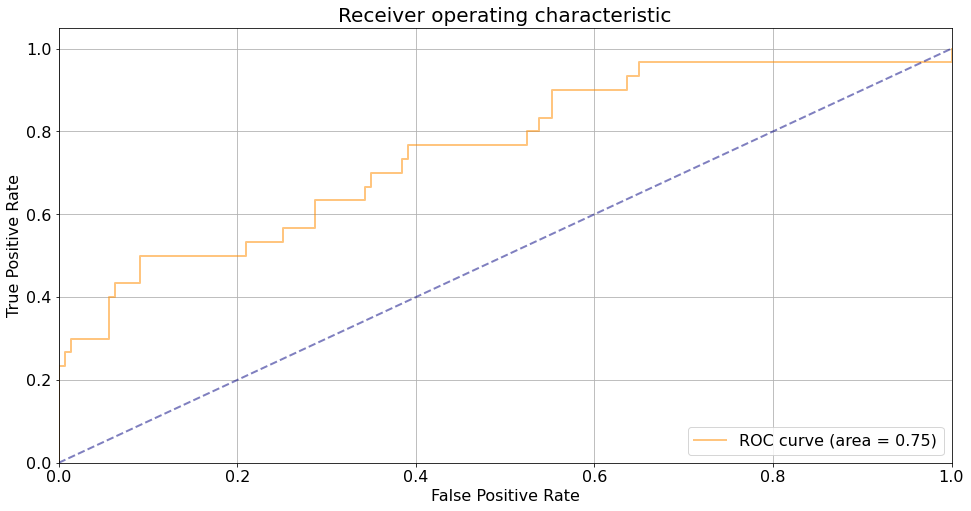

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [244]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

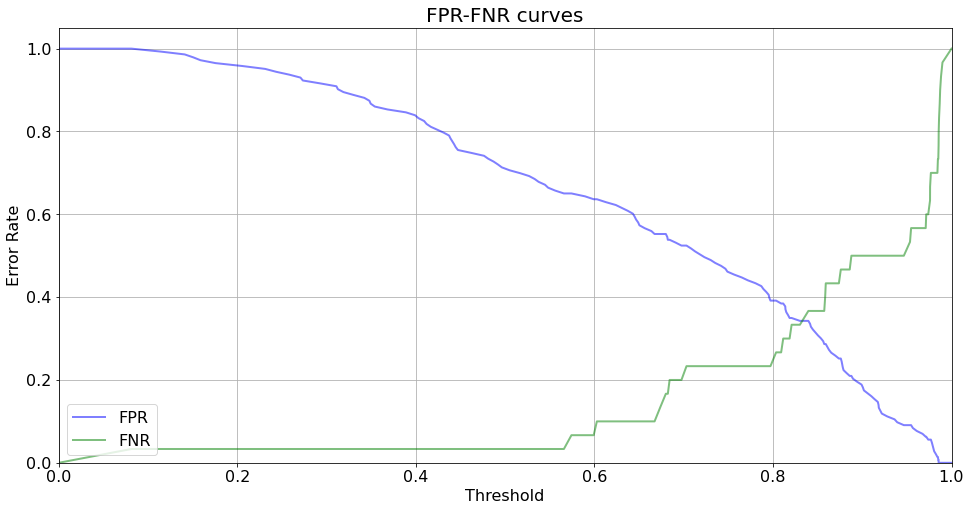

In [245]:
plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [246]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01))
print(select_threshold(model=model, data=eval_pool, FPR=0.01))

0.0
0.9852187137525359


In [247]:
confusion_matrix(y_validation, model.predict(data=X_validation))

array([[ 42, 101],
       [  1,  29]])

In [248]:
"""array([[ 38, 105],
       [  1,  29]]) === 99""" """array([[ 42, 101],
       [  1,  29]]) == 95"""

'array([[ 38, 105],\n       [  1,  29]]) === 99'

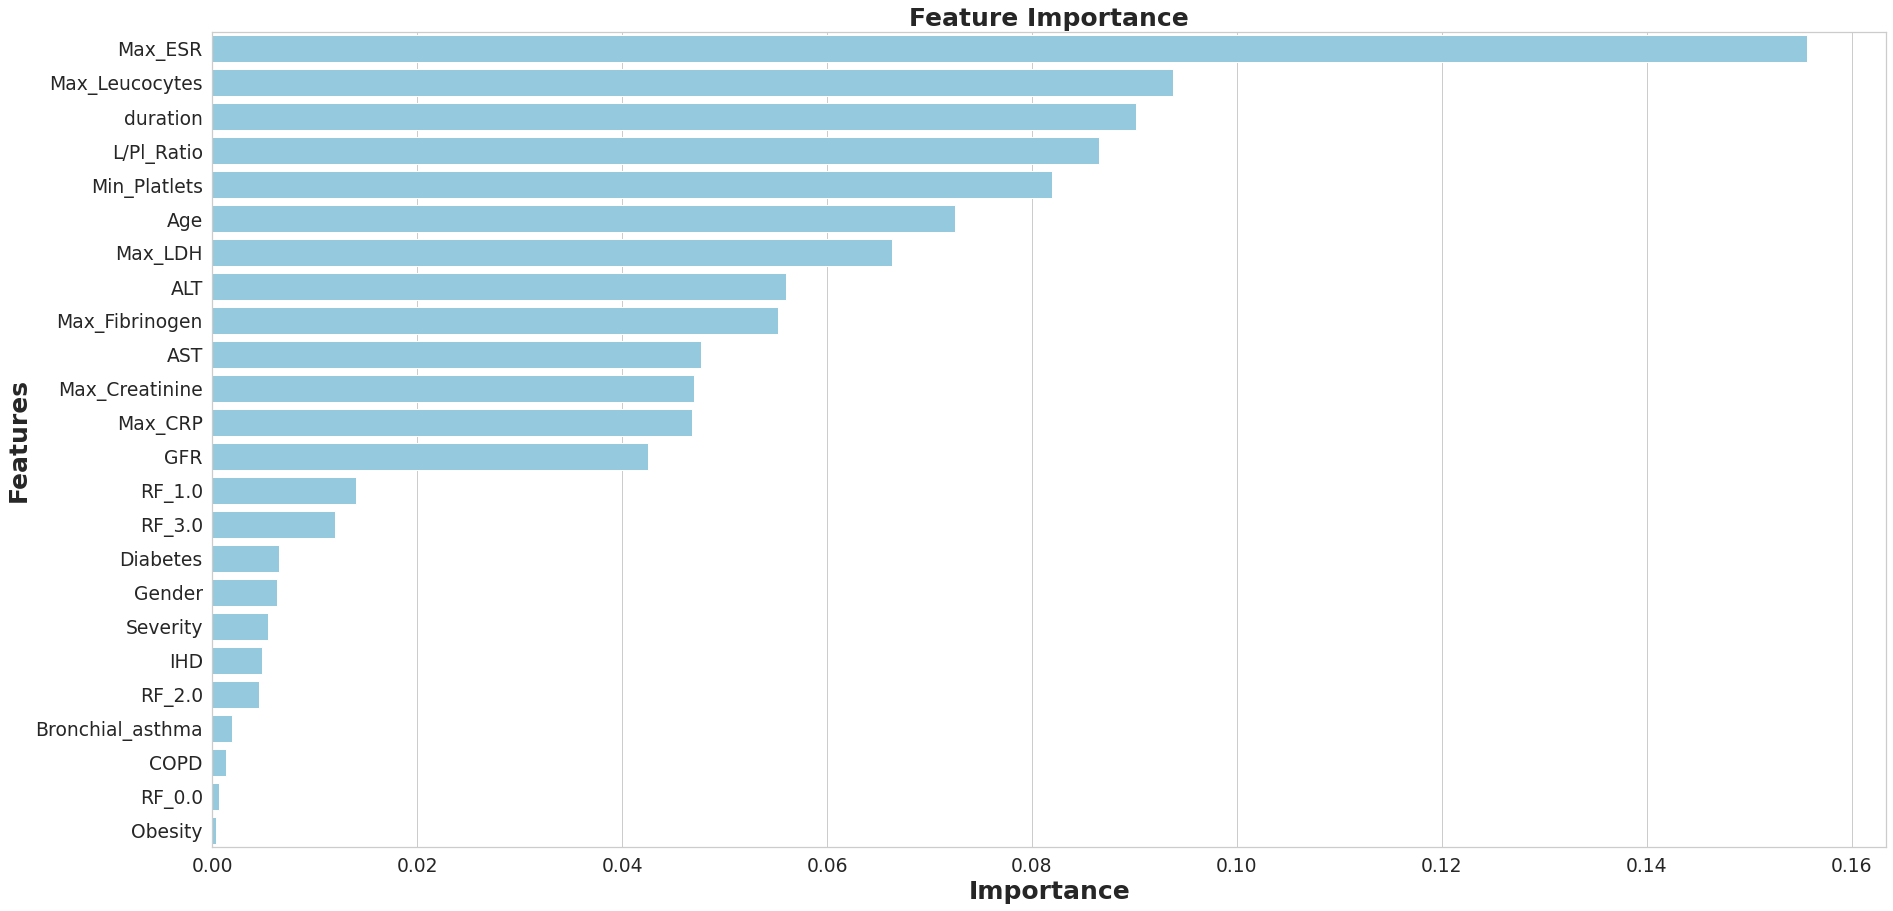

None

Features  Gini-Importance
0            Max_ESR         0.155614
1     Max_Leucocytes         0.093789
2           duration         0.090121
3         L/Pl_Ratio         0.086520
4       Min_Platlets         0.082003
5                Age         0.072479
6            Max_LDH         0.066321
7                ALT         0.056006
8     Max_Fibrinogen         0.055207
9                AST         0.047680
10    Max_Creatinine         0.047061
11           Max_CRP         0.046815
12               GFR         0.042508
13            RF_1.0         0.014026
14            RF_3.0         0.011933
15          Diabetes         0.006484
16            Gender         0.006270
17          Severity         0.005430
18               IHD         0.004887
19            RF_2.0         0.004536
20  Bronchial_asthma         0.001963
21              COPD         0.001323
22            RF_0.0         0.000673
23           Obesity         0.000350

In [ ]:
feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

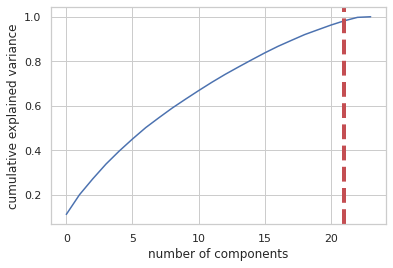

None

Cumulative Variance Ratio  Explained Variance Ratio
0                   0.111682                  0.111682
1                   0.200461                  0.088779
2                   0.271482                  0.071021
3                   0.337967                  0.066486
4                   0.396494                  0.058526
5                   0.450530                  0.054036
6                   0.501647                  0.051117
7                   0.546277                  0.044630
8                   0.589529                  0.043252
9                   0.629249                  0.039720

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=24)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=21, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [ ]:
pca = PCA(n_components=21)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:

pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_,  index=pca_dims)
pca_test_df.head(10).T

PCA Component 0  PCA Component 1  ...  PCA Component 8  PCA Component 9
0         -0.261079         0.255663  ...        -0.303310         0.152961
1         -0.117237         0.063164  ...        -0.094947         0.133128
2          0.201835        -0.268233  ...         0.248353        -0.069352
3          0.225242        -0.197516  ...        -0.195334        -0.400751
4         -0.012581        -0.064007  ...         0.010819        -0.011683
5         -0.059083        -0.176941  ...         0.373577         0.184905
6          0.259683        -0.111670  ...         0.251099         0.088590
7          0.209133        -0.286563  ...        -0.283460         0.102575
8          0.290547        -0.118957  ...        -0.406336         0.081504
9         -0.285782         0.115836  ...        -0.087798        -0.151644
10         0.038900         0.166859  ...        -0.141541         0.552884
11         0.031728         0.093723  ...         0.130537         0.236684
12         0.071957         0.309501  ...         0.035991        -0.454302
13         0.216619        -0.060886  ...        -0.154348         0.005545
14         0.144198         0.108482  ...         0.038539        -0.168388
15        -0.132389         0.049684  ...        -0.055282        -0.207720
16         0.399343         0.201717  ...        -0.281142         0.011373
17         0.240210         0.376594  ...         0.381881         0.085890
18        -0.023914         0.236913  ...        -0.000455        -0.121641
19         0.111712         0.035054  ...         0.180300        -0.109979
20         0.166978        -0.297669  ...         0.058228         0.102646
21         0.056226         0.079138  ...         0.027249         0.147354
22        -0.432509        -0.348683  ...        -0.065156        -0.029931
23         0.066611         0.235466  ...        -0.103751         0.062988

[24 rows x 10 columns]

In [ ]:
rfc = RandomForestClassifier(class_weight={0:1, 1:1000})
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))

1.0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              }

               
rs = RandomizedSearchCV(rfc, 
                        param_dist,
                         
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_
# {'bootstrap': False,
#  'max_depth': 15,
#  'max_features': 'log2',
#  'min_samples_leaf': 7,
#  'min_samples_split': 23,
#  'n_estimators': 700}

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

param_n_estimators param_min_samples_split  ... mean_test_score rank_test_score
0                700                      23  ...        0.660870               1
1               1000                      12  ...        0.639130               2
2                300                      28  ...        0.611594               3
3                400                      23  ...        0.560870               4
4                800                      28  ...        0.521739               5
5                700                      23  ...        0.518841               6
6                500                      18  ...        0.486957               7
7                700                       2  ...        0.469565               8
8                600                      23  ...        0.449275               9
9                400                      23  ...        0.436232              10

[10 rows x 8 columns]

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_
# {'bootstrap': False,
# 'max_depth': 7,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 3,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 25.4min finished


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 700}

In [ ]:
#y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

In [ ]:
from sklearn.metrics import confusion_matrix
#conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
#display(conf_matrix_baseline)
#display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display(conf_matrix_baseline_pca)
display('Baseline Random Forest With PCA recall score', recall_score(y_test, y_pred_pca))
display(conf_matrix_tuned_pca)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred_gs))

predicted 0  predicted 1
actual 0          136            7
actual 1           26            4

'Baseline Random Forest With PCA recall score'

0.13333333333333333

predicted 0  predicted 1
actual 0           79           64
actual 1            9           21

'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score'

0.7

In [ ]:
sv_clf = SVC(class_weight={0:1, 1:1000})

param_dist = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

               
rs1 = RandomizedSearchCV(sv_clf, 
                        param_dist,
                         
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=123)
rs1.fit(X_train_scaled_pca, y_train)
rs1.best_params_

#{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}




# #svm
#     sv_clf = SVC(class_weight={0: .5, 1:1000})
    
#     sv_clf.fit(x_train, y_train)
#     sv_clf_pred = sv_clf.predict(x_test)
#     print('SVM conf{0}'.format(confusion_matrix(y_test, sv_clf_pred)))

# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall']

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:


X = data.drop('Ab_ind', axis=1)
y = data['Ab_ind']
n_samples = X.shape[0]
# # Split the dataset in two equal parts
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=123,
        , tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_scaled_pca, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [57]:
df = pd.read_csv('/content/covid_data_6_mistakes (1).csv')

In [58]:
X = df.drop('Ab_ind', axis =1)
y = df['Ab_ind']

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np

#agora vamos transformar o df em algo otimizado para o xgboost
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score

data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
#esse random state éé bom

def objective(space):
    print(space)
    clf = xgb.XGBRegressor(n_estimators =1000,
                           n_fold = 5,
                           num_parallel_tree = 100,
                           colsample_bytree=space['colsample_bytree'],
                           learning_rate = space['learning_rate'],
                           max_depth = int(space['max_depth']),
                           min_child_weight = int(space['min_child_weight']),
                           subsample = space['subsample'],
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'],
                           reg_alpha = space['reg_alpha'],
                           scale_pos_weight = space['scale_pos_weight'],
                           objective = 'binary:logistic')

    eval_set  = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=eval_set,
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)

    for i in range(len(pred)):

      if pred[i] >= 0.5:

        pred[i] = 1

      else:

        pred[i] = 0

    #score = roc_auc_score(y_test, pred)
    score = f1_score(y_test, pred)
    #score = accuracy_score(y_test, pred)
    print ("SCORE:", score)
    return {'loss':1 - score, 'status': STATUS_OK }


space ={'max_depth': hp.uniform("x_max_depth", 1, 10),
        'min_child_weight': hp.uniform ('x_min_child', 1, 10),
        'subsample': hp.uniform ('x_subsample', 0.5, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1, 1.0),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.5 ,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda',0,4),
        'reg_alpha' : hp.uniform('x_reg_alpha', 0, 4),
        'learning_rate' :hp.uniform('x_learning_rate', 0.01 , 0.2),
        'scale_pos_weight' :hp.uniform('x_scale_pos_weight', 0.1, 5)
    }


trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=500,
            trials=trials)

print(best)

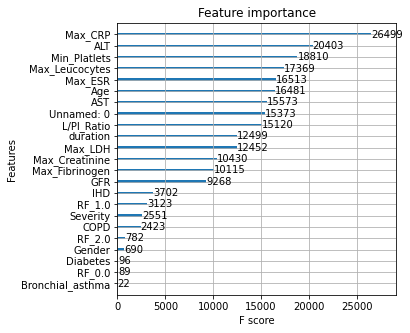

Verdadeiros positivos =  203
Verdadeiros negativos =  14
Falsos positivos =  22
Falsos negativos =  20
Acurácia: 0.84
Precisão: 0.41
Recall: 0.39
f1_score: 0.40


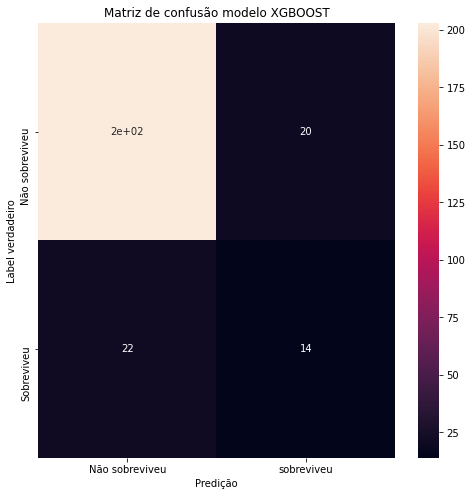

In [66]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree =  0.7296415233740619, learning_rate = 0.1644016463719345,
                max_depth =  4, n_estimators = 200, subsamples = 0.695605, nfold=10, gamma = 0.6240169335121174, verbosity = 1, booster = 'gbtree',
                reg_lambda = 3 , reg_alpha = 0.004403196616164562, scale_pos_weight = 4.5486222464759845, num_parallel_tree = 200,
                max_delta_step = 1, min_child_weight = 1)


xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

for i in range(len(preds)):

  if preds[i] >= 0.5:

    preds[i] = 1

  else:

    preds[i] = 0

accuracy = accuracy_score(y_test, preds)


xgb.plot_importance(xg_reg)


plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


conf_matrix = confusion_matrix(y_test, preds)

#tn, fp, fn, tp = conf_matrix.ravel()

tp = conf_matrix[0,0]
fp = conf_matrix[1,0]
tn = conf_matrix[1,1]
fn = conf_matrix[0,1]


print('Verdadeiros positivos = ', tp)
print('Verdadeiros negativos = ', tn)
print('Falsos positivos = ', fp)
print('Falsos negativos = ', fn)


plt.subplots(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax);

ax.set_xlabel('Predição');ax.set_ylabel('Label verdadeiro'); 
ax.set_title('Matriz de confusão modelo XGBOOST'); 
ax.xaxis.set_ticklabels(['Não sobreviveu', 'sobreviveu']); ax.yaxis.set_ticklabels(['Não sobreviveu', 'Sobreviveu']);


print("Acurácia: %.2f" % accuracy_score(y_test, preds))
print("Precisão: %.2f" % precision_score(y_test, preds))
print("Recall: %.2f" % recall_score(y_test, preds))
print("f1_score: %.2f" % f1_score(y_test, preds))
